In [1]:
# System
import os
#nltk.download('stopwords')
# Time
import time
import datetime

# Numerical
import numpy as np
import pandas as pd

# Tools
import itertools
from collections import Counter
from wordcloud import WordCloud,STOPWORDS

# Visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
%matplotlib inline

In [6]:
clean_df = pd.read_csv('data/clean_sentiment.csv')

In [7]:
clean_df.head()

,text,target
0,climate change is an interesting hustle as it ...,-1
1,watch beforetheflood right here as travels the...,1
2,fabulous leonardo dicaprio's film on climate c...,1
3,just watched this amazing documentary by leona...,1
4,pranita biswasi a lutheran from odisha gives t...,2


In [8]:
clean_df.dtypes

text      object
target     int64
dtype: object

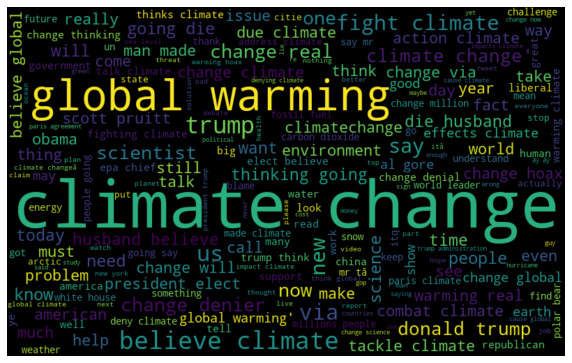

In [10]:
# generating a word cloud to analyse if the common words have changed after data cleaning
all_words = ' '.join([str(text) for text in clean_df['text']])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

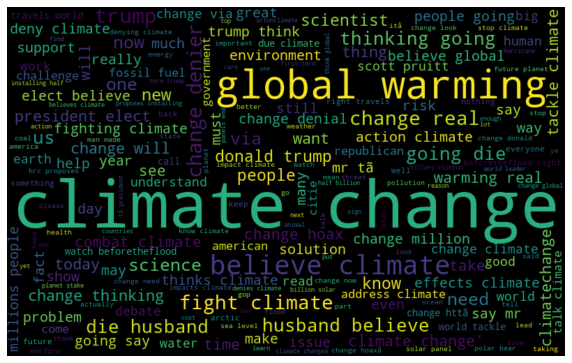

In [11]:
# generating wordcloud for pro-climate change tweets
all_words = ' '.join([str(text) for text in clean_df['text'][clean_df['target'] == 1]])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

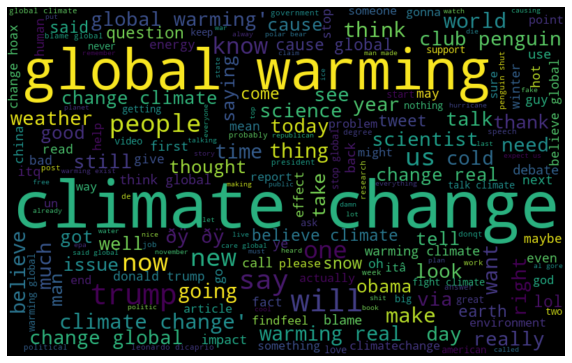

In [12]:
# generating wordcloud for neutral-climate change tweets
all_words = ' '.join([str(text) for text in clean_df['text'][clean_df['target'] == 0]])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

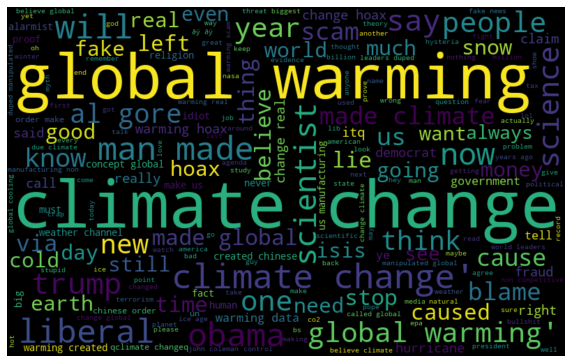

In [13]:
# generating wordcloud for anti-climate change tweets
all_words = ' '.join([str(text) for text in clean_df['text'][clean_df['target'] == -1]])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

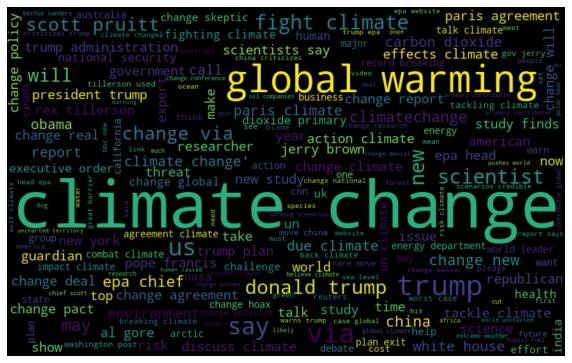

In [14]:
# generating wordcloud for news-climate change tweets
all_words = ' '.join([str(text) for text in clean_df['text'][clean_df['target'] == 2]])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [15]:
count_target=clean_df.groupby(clean_df['target'])['text'].agg([('text' , lambda x : x.count())])
count_target

,text
target,
-1,3988
0,7709
1,22958
2,9276


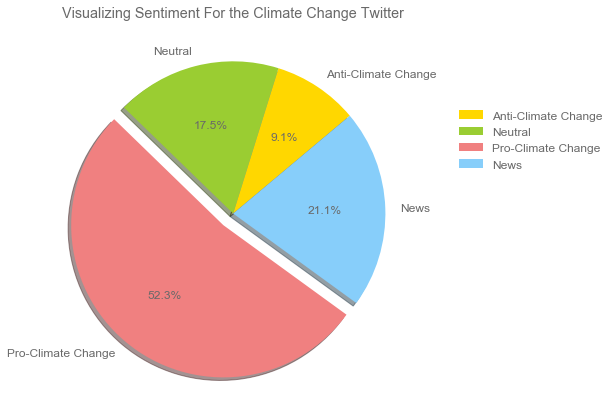

In [17]:
labels=['Anti-Climate Change', 'Neutral', 'Pro-Climate Change', 'News']
fig, ax = plt.subplots(figsize=(7, 7))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#696969'
plt.rcParams['axes.labelcolor']= '#2F4F4F'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
explode=(0,0,0.1,0)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
ax.pie(x=count_target["text"],labels=labels,colors=colors, autopct='%1.1f%%',shadow=True,startangle=40,explode=explode)
ax.set_title("Visualizing Sentiment For the Climate Change Twitter")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()